**Objectives**

In this project, you will:

    Load the data as a pandas dataframe
    Clean the data, taking care of the blank entries
    Run exploratory data analysis and identify the attributes that most affect the charges
    Develop single variable and multi variable Linear Regression models for predicting the charges
    Use Ridge regression to refine the performance of Linear regression models.

# **Practice Project: Insurance Cost Analysis**

Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup


For this lab, we will be using the following libraries:
* `skillsnetwork` to download the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import  StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import  cross_val_score, train_test_split
%matplotlib inline


download The dataset to this lab enviroment

In [4]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
df = pd.read_csv(filepath)
file = df.to_csv('insurance.csv')

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [5]:
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


Add the headers to the dataframe, as mentioned in the project scenario. 


In [6]:
headers = ['age','gender','bmi','no_of_children','smoker','region','charges']

df.columns = headers

In [7]:
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


Now, replace the '?' entries with 'NaN' values.


In [9]:
df.replace('?', np.nan, inplace=True)

# Task 2 : Data Wrangling


Use dataframe.info() to identify the columns that have some 'Null' (or NaN) information.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [21]:
avg_age = df['age'].astype('float').mean(axis=0)
df['age'].replace(np.nan, avg_age, inplace=True)

mode_smoker = df['smoker'].value_counts().idxmax()

df['smoker'].replace(np.nan, mode_smoker, inplace=True)


In [23]:
df[['age', 'smoker']] = df[['age', 'smoker']].astype('int')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int64  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   int64  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


(0.0, 66902.8557155)

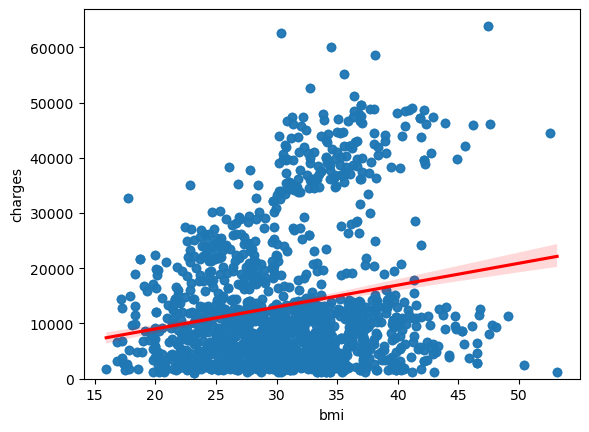

In [29]:
sns.regplot(x='bmi', y='charges', data=df, line_kws={"color": "red"})
plt.ylim(0,)

Implement the box plot for `charges` with respect to `smoker`.


/home/techlateef/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/techlateef/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/techlateef/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='smoker', ylabel='charges'>

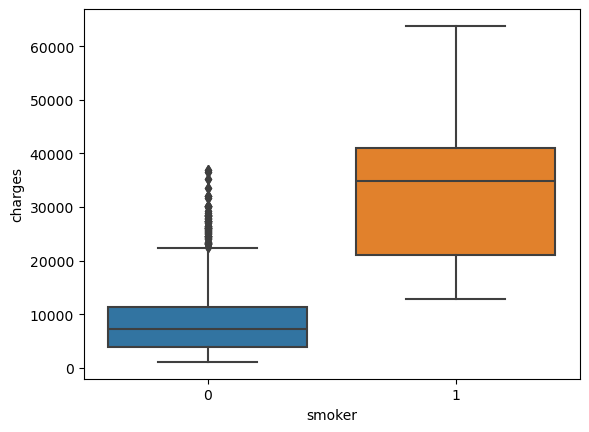

In [31]:
sns.boxplot(x='smoker', y='charges', data=df)

Print the correlation matrix for the dataset.


In [33]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026584  0.112859        0.037126 -0.022290   
gender         -0.026584  1.000000  0.042766        0.015693  0.083125   
bmi             0.112859  0.042766  1.000000       -0.001642  0.011824   
no_of_children  0.037126  0.015693 -0.001642        1.000000  0.007016   
smoker         -0.022290  0.083125  0.011824        0.007016  1.000000   
region         -0.006969  0.022360  0.271200       -0.025594  0.053839   
charges         0.298892  0.062959  0.199906        0.066551  0.789141   

                  region   charges  
age            -0.006969  0.298892  
gender          0.022360  0.062959  
bmi             0.271200  0.199906  
no_of_children -0.025594  0.066551  
smoker          0.053839  0.789141  
region          1.000000  0.054018  
charges         0.054018  1.000000  


# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [35]:
lr = LinearRegression()
lr

LinearRegression()

In [36]:
y_data = df['charges']
x_data = df.drop('charges', axis=1)

In [38]:
lr.fit(x_data, y_data)

LinearRegression()

In [39]:
lr.score(x_data,y_data)

0.7505888658724134

Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [45]:
Input = [('Scaler', StandardScaler()),('Polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [47]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [49]:
z = x_data.astype(float)
pipe.fit(z, y_data)
ypipe = pipe.predict(z)
print(r2_score(y_data,ypipe))

0.845370218903214


# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=1)
print('Train data size:', x_train.shape[0])
print('Test data size:', x_test.shape[0])


Train data size: 2216
Test data size: 555


Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [53]:
RidgeModel = Ridge(alpha=0.1)
RidgeModel

Ridge(alpha=0.1)

In [54]:
RidgeModel.fit(x_train, y_train)

Ridge(alpha=0.1)

In [59]:

yhat = RidgeModel.predict(x_test)
print(r2_score(y_test, yhat))

0.7254198907320981


In [60]:
RidgeModel.score(x_test, y_test)

0.7254198907320981

Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [63]:
pr = PolynomialFeatures()
x_test_pr = pr.fit_transform(x_test)
x_train_pr = pr.fit_transform(x_train)


In [64]:
RidgeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [67]:
y_hat = RidgeModel.predict(x_test_pr)
y_hat[0:5]

array([ 5228.54745132,  4092.97641547, 10583.74215605, 25920.56568882,
       11774.50294877])

In [68]:
print(r2_score(y_test, y_hat))

0.820841322334583
